In [1]:
!wget -O face_emotion.zip "https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290" facemask


--2021-12-02 11:53:25--  https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290
Resolving filesender.renater.fr (filesender.renater.fr)... 194.57.3.10
Connecting to filesender.renater.fr (filesender.renater.fr)|194.57.3.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80330117 (77M) [application/zip]
Saving to: ‘face_emotion.zip’

face_emotion.zip    100%[===================>]  76.61M   252KB/s    in 5m 16s  

2021-12-02 11:58:44 (248 KB/s) - ‘face_emotion.zip’ saved [80330117/80330117]

--2021-12-02 11:58:44--  http://facemask/
Resolving facemask (facemask)... failed: Name or service not known.
wget: unable to resolve host address ‘facemask’
FINISHED --2021-12-02 11:58:44--
Total wall clock time: 5m 19s
Downloaded: 1 files, 77M in 5m 16s (248 KB/s)


In [2]:
!unzip -q face_emotion.zip -d image_emotion

In [3]:
picture_size = 48

In [4]:
import os
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
dataset_Foldre="image_emotion/image_emotion/train"
dataset_Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_train = np.array(data, dtype="float32")
labels_train = np.array(labels)
dataset_Foldre="image_emotion/image_emotion/test"
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_test = np.array(data, dtype="float32")
labels_test = np.array(labels)
        

In [5]:
from keras import models
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import Sequential

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model3.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=7,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48


In [37]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_70 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_63 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_52 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 activation_71 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_64 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

In [38]:
model.compile(optimizer=Adam(lr=1e-7), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
"""batch_size = 128
data_size = data_train.shape[0]
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()"""

In [39]:
history = model.fit(data_train, labels_train,shuffle=True,
                    validation_data=(data_test, labels_test),
                    epochs=50,
                    batch_size=64,callbacks=callbacks_list)

Epoch 1/50
449/449 [==============================] - 36s 75ms/step - loss: 3.2462 - accuracy: 0.1426 - val_loss: 2.3515 - val_accuracy: 0.1420 - lr: 1.0000e-07
Epoch 2/50
449/449 [==============================] - 33s 73ms/step - loss: 3.2096 - accuracy: 0.1456 - val_loss: 2.3232 - val_accuracy: 0.1477 - lr: 1.0000e-07
Epoch 3/50
449/449 [==============================] - 32s 72ms/step - loss: 3.2311 - accuracy: 0.1438 - val_loss: 2.3227 - val_accuracy: 0.1491 - lr: 1.0000e-07
Epoch 4/50
449/449 [==============================] - 32s 72ms/step - loss: 3.2323 - accuracy: 0.1459 - val_loss: 2.3142 - val_accuracy: 0.1491 - lr: 1.0000e-07
Epoch 5/50
449/449 [==============================] - 33s 72ms/step - loss: 3.2076 - accuracy: 0.1473 - val_loss: 2.3202 - val_accuracy: 0.1468 - lr: 1.0000e-07
Epoch 6/50
449/449 [==============================] - 32s 72ms/step - loss: 3.2260 - accuracy: 0.1473 - val_loss: 2.3099 - val_accuracy: 0.1475 - lr: 1.0000e-07
Epoch 7/50
449/449 [==============

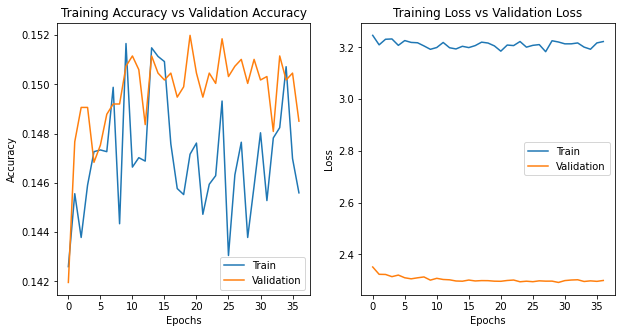

In [40]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(10,5)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='best')

plt.show()

In [41]:
model.save('emotion_detection.h5')
model.save_weights('model_weight.h5')
np.save("history", history.history)

In [42]:
type(data_test)

numpy.ndarray

In [43]:
print(model.predict(data_test))

[[0.0775662  0.09208376 0.23754895 ... 0.17576164 0.3393366  0.042054  ]
 [0.051852   0.11986084 0.07862073 ... 0.5599976  0.06894977 0.03352305]
 [0.08775885 0.18323126 0.13762417 ... 0.11216713 0.26636475 0.19363451]
 ...
 [0.17588401 0.07042264 0.30110157 ... 0.10732745 0.16866416 0.08377769]
 [0.13161138 0.02263541 0.06450109 ... 0.0834731  0.6016171  0.08560303]
 [0.13245134 0.09326057 0.19507127 ... 0.2179065  0.2736806  0.0584121 ]]


In [44]:
from tensorflow.keras.models import load_model
model2= load_model("emotion_detection.h5")
model2.load_weights("model_weight.h5")

In [45]:
print(model2.predict(data_test))

[[0.0775662  0.09208376 0.23754895 ... 0.17576164 0.3393366  0.042054  ]
 [0.051852   0.11986084 0.07862073 ... 0.5599976  0.06894977 0.03352305]
 [0.08775885 0.18323126 0.13762417 ... 0.11216713 0.26636475 0.19363451]
 ...
 [0.17588401 0.07042264 0.30110157 ... 0.10732745 0.16866416 0.08377769]
 [0.13161138 0.02263541 0.06450109 ... 0.0834731  0.6016171  0.08560303]
 [0.13245134 0.09326057 0.19507127 ... 0.2179065  0.2736806  0.0584121 ]]
